In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
%matplotlib inline

def Database():
    """compile data sets into a data library, the output will be a DataFrame"""
    data_1 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=3)
    data = data_1[['Name','Family', 'FP Exp.', 'CN Exp.']]
    result_1 = data.drop(index=0)
    result_1.reset_index(drop=True, inplace=True)
    data_2 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=4)
    result_2 = data_2.loc[: , '-H': 'aaCa']
    result = pd.concat([result_1, result_2], axis=1)
    return result

## data clean

In [3]:
df = Database()
train, test = train_test_split(df, test_size=0.1)
a = train[train.columns[4:]]
X_train = a.mask(a>0, 1)
y_train = train['Family']

b = test[test.columns[4:]]
X_test = b.mask(b>0, 1)
y_test = test['Family']

In [34]:
train.head()

,Name,Family,FP Exp.,CN Exp.,-H,-CH3,-CH2-,>CH-,>C<,=CH2,...,-OH (phenol),-O-,(-O-)R,aOa,>C=O,(>C=O)R,-CHO,-COOH,-COO-,aaCa
890,"(4R,5R)-diethyloctane",Paraffins,NaN,20.0,26,4,6,2,0,0,...,0,0,0,0,0,0,0,0,0,0
322,2-(4-methylcyclohex-3-en-1-yl)propan-2-ol,Cyclic (Oxygenates),367.15,NaN,18,3,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
185,"1,3-xylene",Aromatics,298.15,1.0,10,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
593,propyl tridecanoate,Esters,NaN,NaN,32,2,13,0,0,0,...,0,1,0,0,1,0,0,0,1,0
958,"2,3-dimethylpentane",Paraffins,258.00,NaN,16,4,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0


## knn

In [17]:
# define knn model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
train_pred = knn.predict(X_train)

In [18]:
# print accuracy 
accu = metrics.accuracy_score(y_test, y_pred)
accu

0.99137931034482762

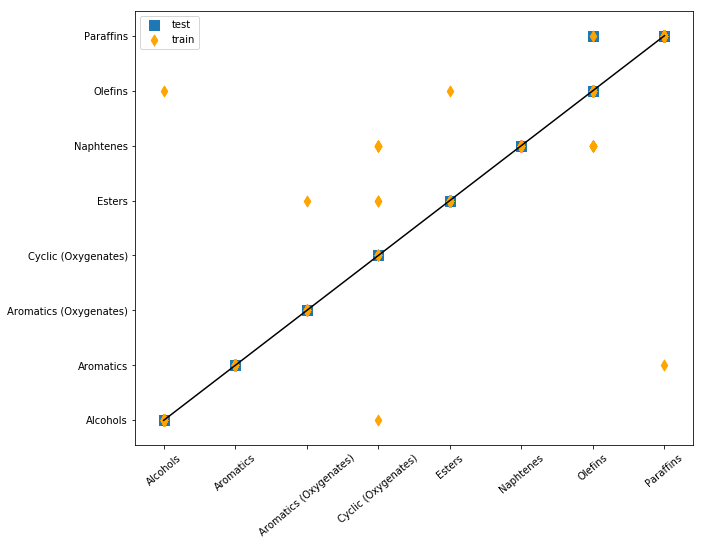

In [19]:
# plot the train and test set
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, marker='s', s=100, label='test')
plt.scatter(y_train, train_pred, marker='d', s=60,c='orange', label='train')
plt.plot([0,7], [0,7], color='k')
plt.xticks(rotation='40')
plt.legend()

### define functions

In [20]:
def train_knn(k, X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

In [21]:
def test_knn(k, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)
    print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))
    plt.figure(figsize=(10,8))
    plt.scatter(y_test, y_pred, marker='s', s=100, label='test')
    plt.scatter(y_train, train_pred, marker='d', s=60,c='orange', label='train')
    plt.plot([0,7], [0,7], color='k')
    plt.xticks(rotation='40')
    plt.legend()
    return

In [27]:
def predict_family_knn(k, X_train, y_train, X):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X)
    return y_pred

In [23]:
train_knn(5, X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Accuracy =  0.991379310345


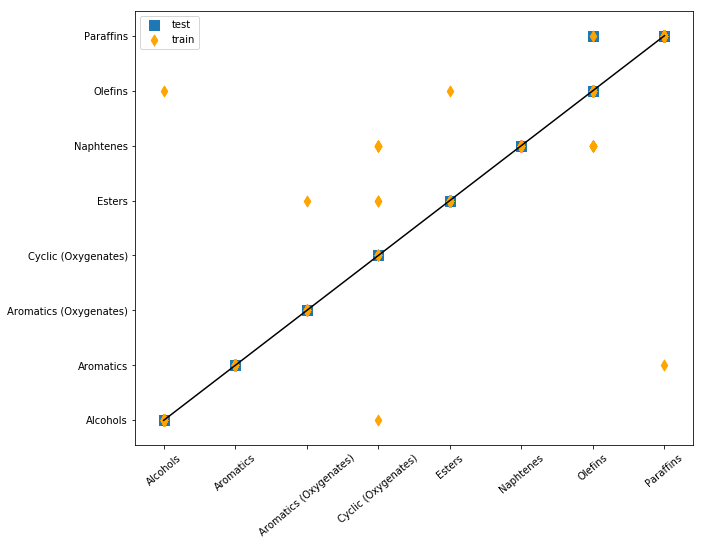

In [24]:
test_knn(5, X_train, y_train, X_test, y_test)

In [39]:
X=X_train.iloc[0:3,:]
X

,-H,-CH3,-CH2-,>CH-,>C<,=CH2,=CH-,=C<,#CH,#C-,...,-OH (phenol),-O-,(-O-)R,aOa,>C=O,(>C=O)R,-CHO,-COOH,-COO-,aaCa
890,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
322,1,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
185,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
predict_family_knn(k, X_train, y_train, X)

array(['Paraffins', 'Naphtenes', 'Aromatics'], dtype=object)